# Projet SY09

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Évaluation des jeux de données candidats

- [Classification des clients (crédit social)](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)
  - Sujet: Prédiction du score social d'un client (classification supervisée)
  - Deux jeux de données : un pour l'entraînement et un pour le test
  - Des valeurs manquantes éparpillées et des valeurs étranges (assimilables à des `NaN`)
- [Thyroïde](https://www.kaggle.com/datasets/aneevinay/thyroid-cancer-recurrence-dataset?select=filtered_thyroid_data.csv)
  - ⚠️ Sujet potentiel : Pourquoi il y a eu récidive ? (compliqué)
  - Pas tant de données que ça (300 lignes, 13 colonnes)
  - Pas de valeurs manquantes
  - **Bof bof**
- [Financial Transactions Dataset Analytics](https://www.kaggle.com/datasets/computingvictor/transactions-fraud-datasets)
- [Analyse de personnalité des clients](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)
  - Sujet : Segmentation des individus (?) (classification non supervisée 'clustering') 
  - Quasi essentiellement que des variables numériques
  - Très peu de valeurs manquantes
- [Prédiction d'obésité](https://www.kaggle.com/datasets/adeniranstephen/obesity-prediction-dataset)
  - Sujet : Prédiction de l'obésité (classification supervisée)
  - ⚠️ Pas de jeu de test (à générer ?)
  - Peu de modalités
  - Pas de valeurs manquantes
- [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)
- [Pokémon](https://www.kaggle.com/datasets/kotsop/pokmon-detective-challenge)
  - Sujet: Prédiction de l'appartenance à la *Team Rocket* par la classification supervisée
  - 1000 valeurs manquantes dans la colonne *Team Rocket* : correspondent au jeu de test
  - Quelques variables qualitatives avec pas mal de modalités (environ 4 variables à 15 modalités)
  - **Intéressant**
- [Predict student's level](https://www.kaggle.com/datasets/farkhod77/predict-students-level/data)
- [Red Wine Quality](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)
- [Faillites de startup](https://www.kaggle.com/datasets/dagloxkankwanda/startup-failures)
  - ❌ Présence de variables qualitatives avec des valeurs non bornées
  - **Ne pas traiter ce jeu de données**
- [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data)

In [123]:
# df = pd.read_csv('./data/candidate_datasets/credit_score/train.csv')
# df = pd.read_csv('./data/candidate_datasets/filtered_thyroid_data/filtered_thyroid_data.csv')
# df = pd.read_csv('./data/candidate_datasets/marketing_campaign/marketing_campaign.csv', sep='\t')
# df = pd.read_csv('./data/candidate_datasets/obesity/ObesityDataSet_raw_and_data_sinthetic.csv')
df = pd.read_csv('./data/candidate_datasets/pokemon_team_rocket_dataset/pokemon_team_rocket_dataset.csv')
# df = pd.read_csv('./data/candidate_datasets/startup_failures/Startup Failure (Finance and Insurance).csv')

In [124]:
# df = pd.read_csv('./data/candidate_datasets/Financial Transactions Dataset Analytics/cards_data.csv') ### Another CSV file available in the same folder
# df = pd.read_csv('./data/candidate_datasets/Pima Indians Diabetes Database/diabetes.csv')
# df = pd.read_excel('./data/candidate_datasets/Predict student\'s level/Predict_student__knowledge_level.xls')
# df = pd.read_csv('./data/candidate_datasets/Red Wine Quality/winequality-red.csv')
# df = pd.read_csv('./data/candidate_datasets/Stroke Prediction Dataset/healthcare-dataset-stroke-data.csv')


### Dimension du tableau individu-variable

In [125]:
print(f"{df.shape[0]} individus et {df.shape[1]} variables.")

5000 individus et 18 variables.


### Premières lignes

In [126]:
df.head(n=20)

,ID,Age,City,Economic Status,Profession,Most Used Pokemon Type,Average Pokemon Level,Criminal Record,PokéBall Usage,Win Ratio,Number of Gym Badges,Is Pokemon Champion,Battle Strategy,Number of Migrations,Rare Item Holder,Debt to Kanto,Charity Participation,Team Rocket
0,0,27,Pewter City,Middle,Fisherman,Rock,50,0,DuskBall,51,1,False,Unpredictable,25,False,24511,True,No
1,1,55,Viridian City,Middle,PokéMart Seller,Grass,35,1,HealBall,53,2,False,Unpredictable,19,False,177516,True,Yes
2,2,14,Pallet Town,High,Police Officer,Poison,96,0,NetBall,76,5,False,Aggressive,18,False,85695,True,No
3,3,41,Cerulean City,Middle,Gym Leader Assistant,Dragon,23,0,UltraBall,27,0,False,Defensive,10,False,39739,True,No
4,4,15,Pallet Town,Middle,Gym Leader Assistant,Ground,16,1,HealBall,51,1,False,Aggressive,17,True,126923,False,Yes
5,5,41,Lavender Town,High,Daycare Worker,Ground,87,0,TimerBall,53,2,False,Aggressive,18,True,309636,False,Yes
6,6,21,Celadon City,Low,PokéMart Seller,Ghost,58,0,MasterBall,52,0,False,Unpredictable,8,False,75034,True,No
7,7,25,Lavender Town,Middle,Gym Leader Assistant,Bug,84,0,LuxuryBall,35,0,False,Defensive,25,False,65407,True,No
8,8,40,Saffron City,Middle,Gym Leader Assistant,Fighting,73,0,DarkBall,44,0,False,Aggressive,6,False,33398,True,No
9,9,20,Cinnabar Island,Middle,PokéMart Seller,Electric,9,0,DarkBall,20,1,False,Defensive,2,False,67763,True,No


### Types des colonnes

#### Toutes les colonnes

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      5000 non-null   int64 
 1   Age                     5000 non-null   int64 
 2   City                    5000 non-null   object
 3   Economic Status         5000 non-null   object
 4   Profession              5000 non-null   object
 5   Most Used Pokemon Type  5000 non-null   object
 6   Average Pokemon Level   5000 non-null   int64 
 7   Criminal Record         5000 non-null   int64 
 8   PokéBall Usage          5000 non-null   object
 9   Win Ratio               5000 non-null   int64 
 10  Number of Gym Badges    5000 non-null   int64 
 11  Is Pokemon Champion     5000 non-null   bool  
 12  Battle Strategy         5000 non-null   object
 13  Number of Migrations    5000 non-null   int64 
 14  Rare Item Holder        5000 non-null   bool  
 15  Debt

#### Variables qualitatives

In [128]:
qualitative_variables = df.select_dtypes(include=['object', 'category']).columns

print(f"{len(qualitative_variables)} variables qualitatives : \n")
for variable in qualitative_variables:
    print(f"{variable} ({df[variable].nunique()} modalités) : \n\t{df[variable].unique()}")

7 variables qualitatives : 

City (10 modalités) : 
	['Pewter City' 'Viridian City' 'Pallet Town' 'Cerulean City'
 'Lavender Town' 'Celadon City' 'Saffron City' 'Cinnabar Island'
 'Fuchsia City' 'Vermilion City']
Economic Status (3 modalités) : 
	['Middle' 'High' 'Low']
Profession (16 modalités) : 
	['Fisherman' 'PokéMart Seller' 'Police Officer' 'Gym Leader Assistant'
 'Daycare Worker' 'Casino Worker' 'Rocket Grunt' 'Breeder' 'Nurse'
 'Researcher' 'Elite Trainer' 'Scientist' 'Black Market Dealer' 'Champion'
 'Biker' 'Underground Battler']
Most Used Pokemon Type (18 modalités) : 
	['Rock' 'Grass' 'Poison' 'Dragon' 'Ground' 'Ghost' 'Bug' 'Fighting'
 'Electric' 'Flying' 'Ice' 'Psychic' 'Fire' 'Fairy' 'Water' 'Dark' 'Steel'
 'Normal']
PokéBall Usage (10 modalités) : 
	['DuskBall' 'HealBall' 'NetBall' 'UltraBall' 'TimerBall' 'MasterBall'
 'LuxuryBall' 'DarkBall' 'PokéBall' 'GreatBall']
Battle Strategy (3 modalités) : 
	['Unpredictable' 'Aggressive' 'Defensive']
Team Rocket (2 modalités) : 

#### Statistiques descriptives des variables numériques

In [129]:
df.describe()

,ID,Age,Average Pokemon Level,Criminal Record,Win Ratio,Number of Gym Badges,Number of Migrations,Debt to Kanto
count,5000.000000,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2499.500000,40.30080,52.256400,0.08300,53.190800,2.231200,13.125600,75527.163400
std,1443.520003,17.46132,27.572209,0.27591,18.940563,1.987898,7.790684,76820.989625
min,0.000000,10.00000,5.000000,0.00000,20.000000,0.000000,0.000000,37.000000
25%,1249.750000,25.00000,28.000000,0.00000,37.000000,1.000000,6.000000,29371.250000
50%,2499.500000,41.00000,52.500000,0.00000,53.000000,2.000000,13.000000,58224.000000
75%,3749.250000,55.00000,76.000000,0.00000,69.000000,4.000000,20.000000,86782.000000
max,4999.000000,70.00000,100.000000,1.00000,90.000000,8.000000,30.000000,399007.000000


### Valeurs manquantes

<Axes: >

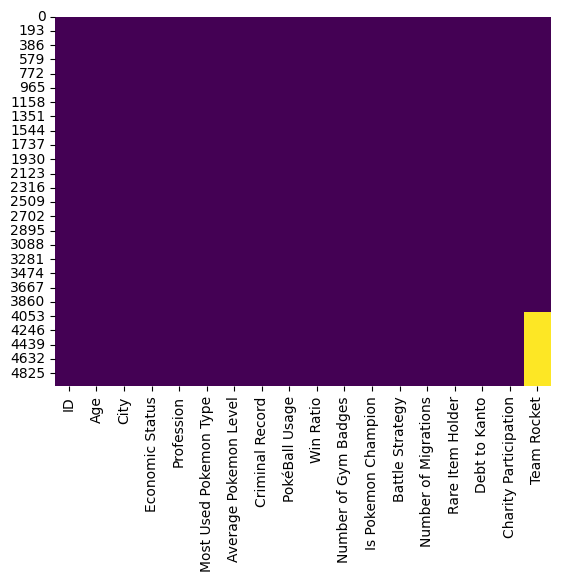

In [130]:
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
# Yellow = missing values, Purple = no missing values

In [131]:
for column in df.columns:
    print(f"{column} : {df[column].isna().sum()} missing values")

ID : 0 missing values
Age : 0 missing values
City : 0 missing values
Economic Status : 0 missing values
Profession : 0 missing values
Most Used Pokemon Type : 0 missing values
Average Pokemon Level : 0 missing values
Criminal Record : 0 missing values
PokéBall Usage : 0 missing values
Win Ratio : 0 missing values
Number of Gym Badges : 0 missing values
Is Pokemon Champion : 0 missing values
Battle Strategy : 0 missing values
Number of Migrations : 0 missing values
Rare Item Holder : 0 missing values
Debt to Kanto : 0 missing values
Charity Participation : 0 missing values
Team Rocket : 1000 missing values


### Tableau entier

In [132]:
display(df)

,ID,Age,City,Economic Status,Profession,Most Used Pokemon Type,Average Pokemon Level,Criminal Record,PokéBall Usage,Win Ratio,Number of Gym Badges,Is Pokemon Champion,Battle Strategy,Number of Migrations,Rare Item Holder,Debt to Kanto,Charity Participation,Team Rocket
0,0,27,Pewter City,Middle,Fisherman,Rock,50,0,DuskBall,51,1,False,Unpredictable,25,False,24511,True,No
1,1,55,Viridian City,Middle,PokéMart Seller,Grass,35,1,HealBall,53,2,False,Unpredictable,19,False,177516,True,Yes
2,2,14,Pallet Town,High,Police Officer,Poison,96,0,NetBall,76,5,False,Aggressive,18,False,85695,True,No
3,3,41,Cerulean City,Middle,Gym Leader Assistant,Dragon,23,0,UltraBall,27,0,False,Defensive,10,False,39739,True,No
4,4,15,Pallet Town,Middle,Gym Leader Assistant,Ground,16,1,HealBall,51,1,False,Aggressive,17,True,126923,False,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,36,Viridian City,Middle,Researcher,Rock,91,0,LuxuryBall,53,5,False,Defensive,5,False,70192,True,NaN
4996,4996,17,Vermilion City,Middle,Gym Leader Assistant,Dragon,23,0,PokéBall,40,0,False,Defensive,1,False,43208,True,NaN
4997,4997,67,Fuchsia City,High,Elite Trainer,Dark,13,0,UltraBall,36,0,False,Defensive,25,False,47794,True,NaN
4998,4998,43,Viridian City,Middle,Daycare Worker,Poison,48,0,MasterBall,51,4,False,Defensive,4,False,10995,True,NaN
